In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from filters.ghk import GFilter, GHFilter, print_steps
from plots.plot_gh import plot_gh_compar_data, plot_gh_compar_param
from simulators.datagen import gen_cvca

## g-h Filter


In [3]:
heights = pd.read_csv("data/heights.csv", header=None).to_numpy().flatten()
heights

array([158. , 164.2, 160.3, 159.9, 162.1, 164.6, 169.6, 167.4, 166.4,
       171. , 171.2, 172.6])

### Predict With Constant Steps


In [4]:
init_estimate = 160.0
time_step = 1
gain_scale = 1

gf = GFilter(x0=init_estimate, dx=time_step, dt=1, g=gain_scale)
ests, preds = gf.batch_filter(heights, save_preds=True)

print_steps(ests[:, 0], preds)

previous x: 160.00, current x: 158.00, predicted x̂: 161.00
previous x: 158.00, current x: 164.20, predicted x̂: 159.00
previous x: 164.20, current x: 160.30, predicted x̂: 165.20
previous x: 160.30, current x: 159.90, predicted x̂: 161.30
previous x: 159.90, current x: 162.10, predicted x̂: 160.90
previous x: 162.10, current x: 164.60, predicted x̂: 163.10
previous x: 164.60, current x: 169.60, predicted x̂: 165.60
previous x: 169.60, current x: 167.40, predicted x̂: 170.60
previous x: 167.40, current x: 166.40, predicted x̂: 168.40
previous x: 166.40, current x: 171.00, predicted x̂: 167.40
previous x: 171.00, current x: 171.20, predicted x̂: 172.00
previous x: 171.20, current x: 172.60, predicted x̂: 172.20


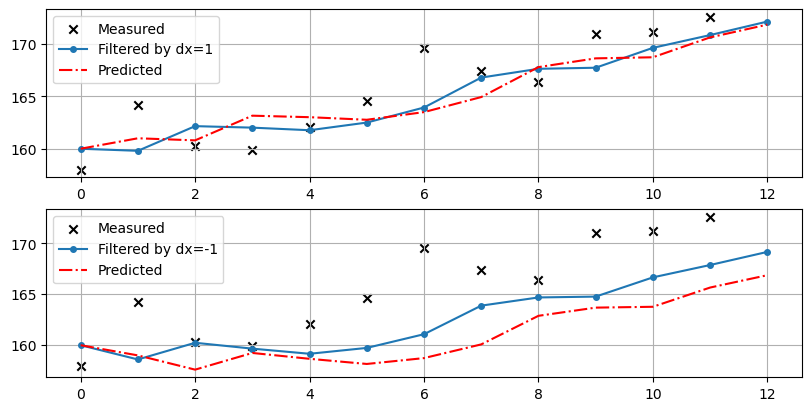

In [5]:
init_estimates = [160] * 2
gain_rates = [1, -1]
gain_scales = [4.0 / 10] * 2

filters = []

for x0, dx, g in zip(init_estimates, gain_rates, gain_scales):
    gf = GFilter(x0=x0, dx=dx, dt=1, g=g)
    filters.append(gf)

_, axes = plt.subplots(2, 1, figsize=(8, 4), constrained_layout=True)

plot_gh_compar_param(
    axes,
    heights,
    filters=filters,
    x0s=init_estimates,
    vary_obj="dx",
    show_preds=True,
    combined=False,
)

# plt.savefig("../images/gh-cv.png")

### Predict With Changing Steps


In [6]:
init_estimate = 160.0
time_step = 1
gain_scale = 1
height_scale = 4.0 / 10

ghf = GHFilter(x0=init_estimate, dx=time_step, dt=1, g=gain_scale, h=height_scale)
ests, preds = ghf.batch_filter(heights, save_preds=True)

print_steps(ests[:, 0], preds)

previous x: 160.00, current x: 158.00, predicted x̂: 161.00
previous x: 158.00, current x: 164.20, predicted x̂: 157.80
previous x: 164.20, current x: 160.30, predicted x̂: 166.56
previous x: 160.30, current x: 159.90, predicted x̂: 160.16
previous x: 159.90, current x: 162.10, predicted x̂: 159.65
previous x: 162.10, current x: 164.60, predicted x̂: 162.83
previous x: 164.60, current x: 169.60, predicted x̂: 166.04
previous x: 169.60, current x: 167.40, predicted x̂: 172.46
previous x: 167.40, current x: 166.40, predicted x̂: 168.24
previous x: 166.40, current x: 171.00, predicted x̂: 166.50
previous x: 171.00, current x: 171.20, predicted x̂: 172.90
previous x: 171.20, current x: 172.60, predicted x̂: 172.42


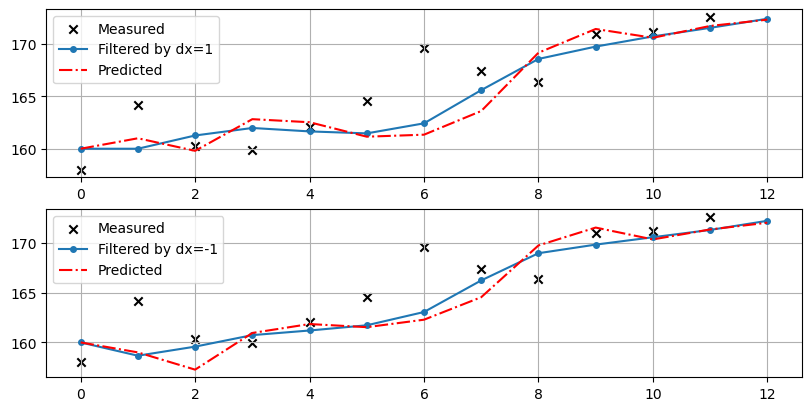

In [7]:
height = [160.0] * 2
gain_rates = [1, -1]
gain_scales = [1.0 / 3] * 2
height_scales = [4.0 / 10] * 2

filters = []

for x0, dx, g, h in zip(init_estimates, gain_rates, gain_scales, height_scales):
    ghf = GHFilter(x0=x0, dx=dx, dt=1, g=g, h=h)
    filters.append(ghf)

_, axes = plt.subplots(2, 1, figsize=(8, 4), constrained_layout=True)

plot_gh_compar_param(
    axes,
    heights,
    filters=filters,
    x0s=init_estimates,
    vary_obj="dx",
    show_preds=True,
    combined=False,
)

### Varing Noise


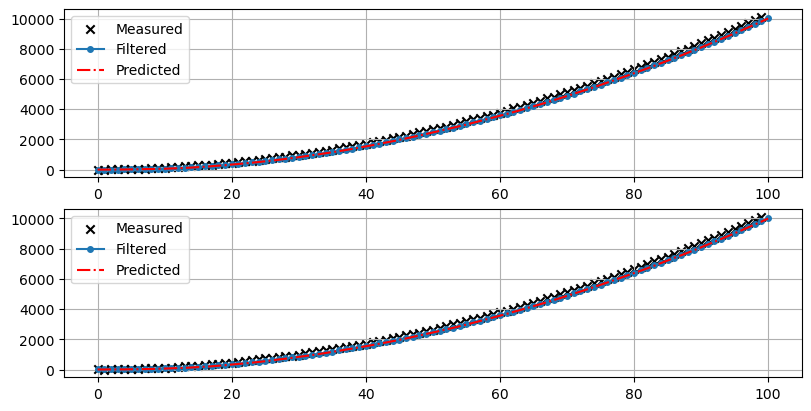

In [8]:
xs1, zs1 = gen_cvca(num=100, x0=5, dx=2, R=100)
xs2, zs2 = gen_cvca(num=100, x0=5, dx=2, R=100 * 2)

ghf = GHFilter(x0=5.0, dx=2.0, dt=1.0, g=0.2, h=0.02)

_, axes = plt.subplots(2, 1, figsize=(8, 4), constrained_layout=True)

plot_gh_compar_data(axes, data_ls=[zs1, zs2], filter=ghf, x0=5.0, show_preds=True)

### Varying g


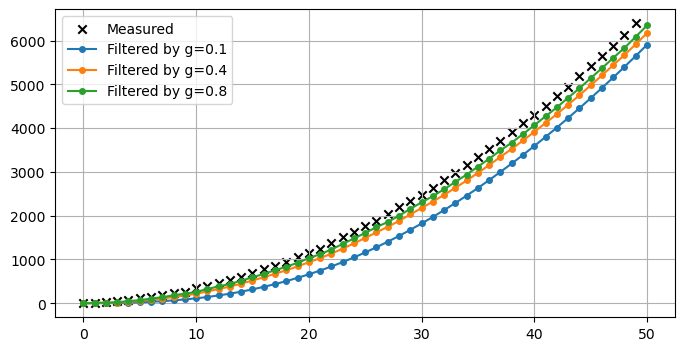

In [9]:
xs, zs = gen_cvca(num=50, x0=5.0, dx=5.0, R=50)

starts = [0] * 3
dxs = [1] * 3
gs = [0.1, 0.4, 0.8]
hs = [0.01] * 3

filters = []
for x0, dx, g, h in zip(starts, dxs, gs, hs):
    ghf = GHFilter(x0=x0, dx=dx, dt=1, g=g, h=h)
    filters.append(ghf)

_, ax = plt.subplots(figsize=(8, 4))

plot_gh_compar_param(
    ax,
    data=zs,
    filters=filters,
    x0s=starts,
    vary_obj="g",
)

# plt.savefig('../images/gh-g.png')

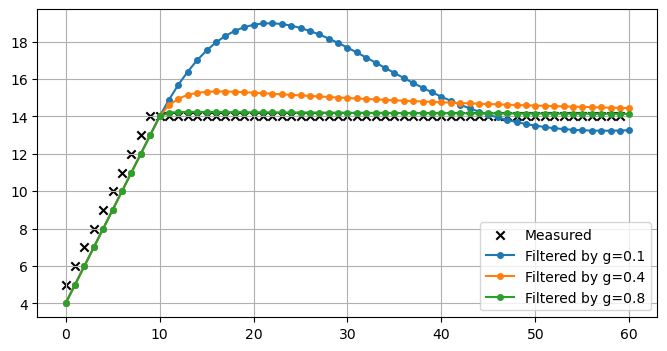

In [10]:
zs = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
zs.extend(14 for _ in range(50))
zs = np.array(zs)

starts = [4] * 3
dxs = [1] * 3
gs = [0.1, 0.4, 0.8]
hs = [0.01] * 3

filters = []
for x0, dx, g, h in zip(starts, dxs, gs, hs):
    ghf = GHFilter(x0=x0, dx=dx, dt=1, g=g, h=h)
    filters.append(ghf)

_, ax = plt.subplots(figsize=(8, 4))

plot_gh_compar_param(
    ax,
    data=zs,
    filters=filters,
    x0s=starts,
    vary_obj="g",
)

# plt.savefig("../images/gh-g.png")

### Varying h


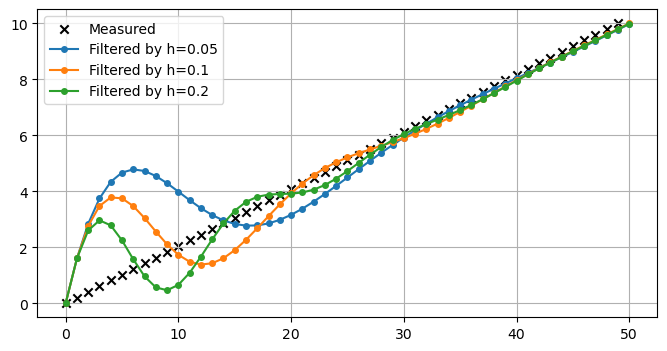

In [11]:
zs = np.linspace(0, 10, 50)

starts = [0] * 3
dxs = [2] * 3
gs = [0.2] * 3
hs = [0.05, 0.1, 0.2]

filters = []
for x0, dx, g, h in zip(starts, dxs, gs, hs):
    ghf = GHFilter(x0=x0, dx=dx, dt=1, g=g, h=h)
    filters.append(ghf)

_, ax = plt.subplots(figsize=(8, 4))

plot_gh_compar_param(
    ax,
    data=zs,
    filters=filters,
    x0s=starts,
    vary_obj="h",
)

# plt.savefig("../images/gh-h.png")

In [12]:
data = pd.read_csv("data/demo.csv", header=None).to_numpy().flatten()
data

array([ 5,  6,  7,  8,  9,  9,  9,  9,  9, 10, 11, 12, 13, 14, 15, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16])

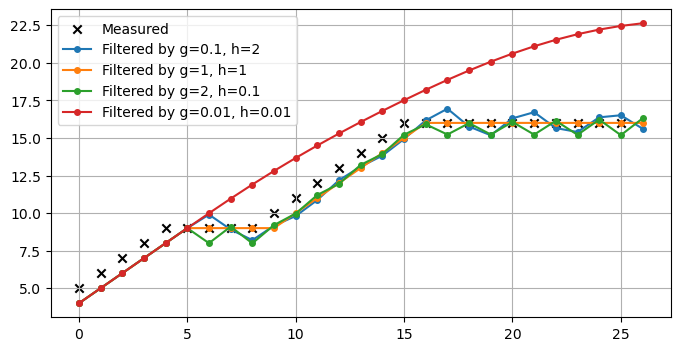

In [13]:
starts = [4] * 4
dxs = [1] * 4
gs = [0.1, 1, 2, 0.01]
hs = [2, 1, 0.1, 0.01]

filters = []
for x0, dx, g, h in zip(starts, dxs, gs, hs):
    ghf = GHFilter(x0=x0, dx=dx, dt=1, g=g, h=h)
    filters.append(ghf)

_, ax = plt.subplots(figsize=(8, 4))

plot_gh_compar_param(
    ax,
    data=data,
    filters=filters,
    x0s=starts,
    vary_obj="gh",
)

# plt.savefig("../images/gh-gh.png")

### Dependent Data


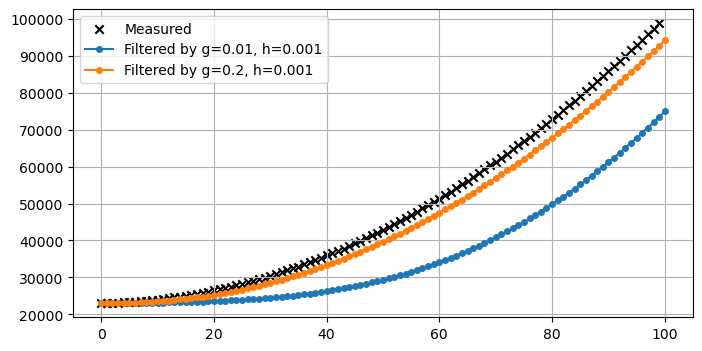

In [14]:
x0 = 23 * 1000
dx = 15

xs, zs = gen_cvca(100, x0, dx, dt=1, R=500)
starts = [x0] * 3
dxs = [dx] * 3
gs = [0.01, 0.2]
hs = [0.001, 0.001]

filters = []
for x0, dx, g, h in zip(starts, dxs, gs, hs):
    ghf = GHFilter(x0=x0, dx=dx, dt=1, g=g, h=h)
    filters.append(ghf)

_, ax = plt.subplots(figsize=(8, 4))

plot_gh_compar_param(
    ax,
    data=zs,
    filters=filters,
    x0s=starts,
    vary_obj="gh",
)

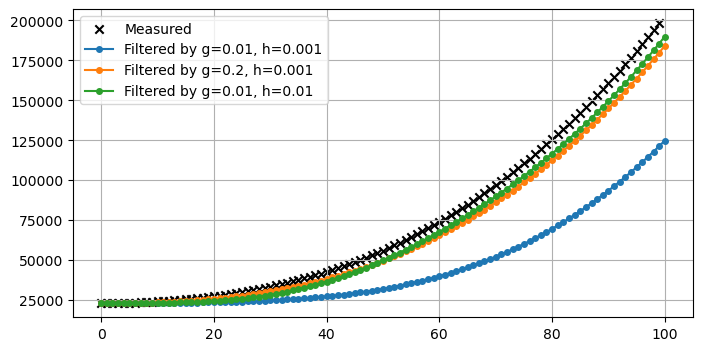

In [15]:
x0 = 23 * 1000
dx = 15

x, zs = gen_cvca(100, x0, dx, ddx=0.2, dt=1, R=500)
starts = [x0] * 3
dxs = [dx] * 3
gs = [0.01, 0.2, 0.01]
hs = [0.001, 0.001, 0.01]

filters = []
for x0, dx, g, h in zip(starts, dxs, gs, hs):
    ghf = GHFilter(x0=x0, dx=dx, dt=1, g=g, h=h)
    filters.append(ghf)

_, ax = plt.subplots(figsize=(8, 4))

plot_gh_compar_param(
    ax,
    data=zs,
    filters=filters,
    x0s=starts,
    vary_obj="gh",
)